In [1]:
import pandas as pd
import os
import sys
sys.path.append('..')
from config import get_project_root

enfermedad='sarampion_our_world_in_data'
DATA_PATH= f"{get_project_root()}/data/our_world_in_data"
POPULATION_PATH = f'{DATA_PATH}/argentina.csv'
BIRTH_RATE_PATH = f'{DATA_PATH}/argentina-birth-rate.csv'
UNVACCINATED_PATH = f'{DATA_PATH}/measles_unvaccinated.csv'
CASES_PATH = f'{DATA_PATH}/SARAMPION_HISTORICO_raw.csv'

In [2]:
population = pd.read_csv(POPULATION_PATH).rename(columns={'Birth rate - Sex: all - Age: all - Variant: estimates': 'population', 'Year':'year'})[['year', 'population']].set_index('year')


In [3]:
births = pd.read_csv(BIRTH_RATE_PATH).rename(columns={'Year':'year', 'Birth rate - Sex: all - Age: all - Variant: estimates':'birth_rate'})[['year', 'birth_rate']].set_index('year')


In [4]:
unvaccinated_one_year_olds = pd.read_csv(UNVACCINATED_PATH).rename(columns={'Number of one-year-olds not vaccinated with measles-containing vaccine, 1st dose': 'unvaccinated_one_old', 'Year':'year'})[['year', 'unvaccinated_one_old']].set_index('year')

In [5]:
cases = pd.read_csv(CASES_PATH).rename(columns={'Año': 'year', 'Casos':'cases'})[['year', 'cases']].set_index('year')

In [6]:
data = pd.concat([population, births, unvaccinated_one_year_olds, cases], axis=1).dropna()

In [7]:
data['births'] = data['birth_rate']*data['population']/1000

In [8]:
data['births'] = data['births'].astype(int)

In [9]:
data['cum_births'] = data.births.cumsum(axis=0)

In [10]:
import numpy as np
vaccinated = [np.nan]
recovered = [np.nan]
susceptible = [np.nan]
for ix, row in data.iterrows():
    if ix == 1980:
        continue
    vaccinated_year = data.loc[ix-1]['births'] - row['unvaccinated_one_old']
    recovered_year = data.loc[ix-1]['cases']
    susceptible_year = max(data.loc[ix-1]['births'] - vaccinated_year - recovered_year - data.loc[ix]['cases'], 0)
    vaccinated.append(vaccinated_year)
    recovered.append(recovered_year)
    susceptible.append(susceptible_year)

In [11]:
final_data = pd.concat([data.reset_index(), pd.Series(vaccinated, name='vaccinated'), pd.Series(recovered, name='recovered'), pd.Series(susceptible, name='susceptible')], axis=1).set_index('year').dropna()



In [12]:
final_data

,population,birth_rate,unvaccinated_one_old,cases,births,cum_births,vaccinated,recovered,susceptible
year,,,,,,,,,
1981,28471284,24.104,152622.0,17582.0,686271,1374924,536031.0,16102.0,118938.0
1982,28922768,23.617,218899.0,4432.0,683069,2057993,467372.0,17582.0,196885.0
1983,29377144,23.209,218365.0,7106.0,681814,2739807,464704.0,4432.0,206827.0
1984,29832200,22.876,138710.0,31751.0,682441,3422248,543104.0,7106.0,99853.0
1985,30287120,22.610,304087.0,9240.0,684791,4107039,378354.0,31751.0,263096.0
1986,30748332,22.404,86224.0,6448.0,688885,4795924,598567.0,9240.0,70536.0
1987,31216450,22.232,133419.0,8024.0,694004,5489928,555466.0,6448.0,118947.0
1988,31690790,22.069,87388.0,4751.0,699384,6189312,606616.0,8024.0,74613.0
1989,32165770,21.907,74563.0,4009.0,704655,6893967,624821.0,4751.0,65803.0


In [13]:
final_data

,population,birth_rate,unvaccinated_one_old,cases,births,cum_births,vaccinated,recovered,susceptible
year,,,,,,,,,
1981,28471284,24.104,152622.0,17582.0,686271,1374924,536031.0,16102.0,118938.0
1982,28922768,23.617,218899.0,4432.0,683069,2057993,467372.0,17582.0,196885.0
1983,29377144,23.209,218365.0,7106.0,681814,2739807,464704.0,4432.0,206827.0
1984,29832200,22.876,138710.0,31751.0,682441,3422248,543104.0,7106.0,99853.0
1985,30287120,22.610,304087.0,9240.0,684791,4107039,378354.0,31751.0,263096.0
1986,30748332,22.404,86224.0,6448.0,688885,4795924,598567.0,9240.0,70536.0
1987,31216450,22.232,133419.0,8024.0,694004,5489928,555466.0,6448.0,118947.0
1988,31690790,22.069,87388.0,4751.0,699384,6189312,606616.0,8024.0,74613.0
1989,32165770,21.907,74563.0,4009.0,704655,6893967,624821.0,4751.0,65803.0


In [14]:
final_data.rename(columns={'cases':'infected'}, inplace=True)

In [15]:
data = final_data[['susceptible', 'infected', 'recovered', 'vaccinated']]

In [16]:
data.loc[:,"susceptible":"vaccinated"] = data.loc[:,"susceptible":"vaccinated"].div(data.sum(axis=1), axis=0)

/Users/axelsirota/.pyenv/versions/3.9.1/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/axelsirota/.pyenv/versions/3.9.1/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [17]:
data

,susceptible,infected,recovered,vaccinated
year,,,,
1981,0.172711,0.025531,0.023382,0.778376
1982,0.286891,0.006458,0.025620,0.681031
1983,0.302791,0.010403,0.006488,0.680318
1984,0.146452,0.046568,0.010422,0.796557
1985,0.385522,0.013540,0.046526,0.554413
1986,0.103004,0.009416,0.013493,0.874087
1987,0.172666,0.011648,0.009360,0.806326
1988,0.107511,0.006846,0.011562,0.874081
1989,0.094087,0.005732,0.006793,0.893388


In [18]:
data_numpy = np.array(data)

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from models.pytorchtools import EarlyStopping
import torchmetrics

In [20]:
class SIRV(nn.Module):
    def __init__(self, epsilon=1e-7):
        super(SIRV, self).__init__()
        self.lambda1 = nn.Linear(1,1, bias = False) # tasa de contacto efectivo
        self.lambda2 = nn.Linear(1,1, bias = False) # tasa de immunizacion
        self.lambda3 = nn.Linear(1,1, bias = False) # tasa de recuperacion
        self.lambda4 = nn.Linear(1,1, bias = False) # tasa de incremento de la poblacion
        torch.nn.init.xavier_uniform_(self.lambda1.weight, gain=0.01)
        torch.nn.init.xavier_uniform_(self.lambda2.weight, gain=0.01)
        torch.nn.init.xavier_uniform_(self.lambda3.weight, gain=0.01)
        torch.nn.init.xavier_uniform_(self.lambda4.weight, gain=0.1)
#         torch.nn.init.uniform_(self.lambda4.bias, 0, 1)
        self.epsilon = epsilon
    
    def forward(self, x, size_of_starter_set, amount_of_prediction_in_future):
        assert size_of_starter_set < amount_of_prediction_in_future
        ns = torch.zeros([amount_of_prediction_in_future, 4],dtype=torch.float, requires_grad = False)
        torch.nn.init.xavier_uniform_(ns, gain=0.01)
        
        x[x==0] = self.epsilon
        ns[:x.shape[0]] = x.view(x.shape[0], 4).clone()
        for i in range(size_of_starter_set,amount_of_prediction_in_future):
            a = ns[i-1].clone()
            ns[i][0] = a[0].view(1,1) - self.lambda1(a[0]*a[1].view(1,1)) - self.lambda2(a[0].view(1,1))
            ns[i][1] = a[1].view(1,1) + self.lambda1(a[0]*a[1].view(1,1)) - self.lambda3(a[1].view(1,1))  - self.lambda2(a[1].view(1,1))
            ns[i][2] = a[2].view(1,1) + self.lambda3(a[1].view(1,1))
            ns[i][3] = a[3].view(1,1) + self.lambda2(a[0].view(1,1)) + self.lambda2(a[1].view(1,1)) 
        b = torch.div(ns, ns.sum(axis=1).reshape(-1,1)).clone()
        return b[1:].reshape(-1,4)


In [21]:
def loss_custom(pred, actual):
    loss_func = nn.SmoothL1Loss()
    loss_big = loss_func(pred[:,3], actual[:,3]) + loss_func(pred[:,0], actual[:,0])
    loss_small = loss_func(pred[:,1], actual[:,1]) + loss_func(pred[:,2], actual[:,2])
    return 1000*loss_small + loss_big

In [22]:
y = torch.from_numpy(data_numpy.astype(np.float32))

In [23]:
y.size()

torch.Size([41, 4])

In [24]:
import os
os.makedirs(f'figures/{enfermedad}', exist_ok=True)
os.makedirs(f'models/{enfermedad}', exist_ok=True)

In [25]:
def train(train_set, fold_size=10, future_size=5):
    epsilon = 1e-15
    sir = SIRV(epsilon=epsilon)
    opt = torch.optim.Adam(sir.parameters(), lr=0.05)
    best = 10000
    early_stopping = EarlyStopping(patience=25, verbose=False, delta=1e-7)
    for epoch in range(500):
        out = sir(train_set[:fold_size], size_of_starter_set=min(10, fold_size), amount_of_prediction_in_future=fold_size + future_size+1)
        out = out.squeeze()
        loss = loss_custom(out, train_set[:fold_size + future_size])
        loss.backward()
        opt.step() 
        opt.zero_grad()
        if loss.item() < best:
            best = loss.item()
            torch.save(sir, f'models/{enfermedad}_{fold_size}.pkl')
        if epoch%25 == 0:        
            print(f'Epoch: {epoch}, loss: {loss.item()}')
        if loss.isnan():
            raise ValueError()
        early_stopping(loss.item(), sir)
        if early_stopping.early_stop:
            print("Early stopping")
            break
    return best
    

def train_and_val_k_fold():
    divergences = {}
    rmses = []
    losses = {}
    future_index_check = 15
    min_datapoints = 20
    for fold_size in range(min_datapoints, len(y)-future_index_check):
        print(f'\nAnalyzing fold: {fold_size}\n')
        folded_train_set = y[:fold_size+future_index_check].clone()
        best_loss = train(train_set=folded_train_set, fold_size=fold_size, future_size=future_index_check)
        model = torch.load(f'models/{enfermedad}_{fold_size}.pkl')
        preds = model(folded_train_set[:fold_size], size_of_starter_set=fold_size, amount_of_prediction_in_future=len(folded_train_set)+1)[fold_size:fold_size+future_index_check]
        target = y[fold_size:fold_size+future_index_check]
        target[target==0] = 1e-15
        kl_divergence = torch.nn.functional.kl_div(target.log(), preds, reduction='batchmean').detach().item()
        rmse = torch.sqrt(torchmetrics.functional.mean_squared_error(target, preds)).detach().item()
        print(f'\nKL Divergence:{kl_divergence}\n')
        print(f'\nRMSE:{rmse}\n')
        divergences[fold_size] = kl_divergence
        rmses.append(rmse)
        losses[fold_size] = best_loss
    return divergences, rmses, losses

In [26]:
divergences, rmses, losses = train_and_val_k_fold()


Analyzing fold: 20

Epoch: 0, loss: 0.19568578898906708
Epoch: 25, loss: 0.19189494848251343
Epoch: 50, loss: 0.19152873754501343
Epoch: 75, loss: 0.1911129504442215
Epoch: 100, loss: 0.19060836732387543
Epoch: 125, loss: 0.19004756212234497
Epoch: 150, loss: 0.18945853412151337
Epoch: 175, loss: 0.18885773420333862
Epoch: 200, loss: 0.18825358152389526
Epoch: 225, loss: 0.18764953315258026
Epoch: 250, loss: 0.18704625964164734
Epoch: 275, loss: 0.1864621490240097
Epoch: 300, loss: 0.18583381175994873
Epoch: 325, loss: 0.1852155178785324
Epoch: 350, loss: 0.1845860481262207
Epoch: 375, loss: 0.18394023180007935
Epoch: 400, loss: 0.18332956731319427
Epoch: 425, loss: 0.18259210884571075
Epoch: 450, loss: 0.1818716824054718
Epoch: 475, loss: 0.18112987279891968

KL Divergence:0.04190424457192421


RMSE:0.034409597516059875


Analyzing fold: 21

Epoch: 0, loss: 0.1928393393754959
Epoch: 25, loss: 0.18759509921073914
Epoch: 50, loss: 0.1867711991071701
Epoch: 75, loss: 0.18656839430332184

In [27]:
print(f'Cross-validated KL Divergence: {pd.Series(divergences.values()).mean()}')
print(f'Cross-validated RMSE: {pd.Series(rmses).mean()}')

Cross-validated KL Divergence: 0.0512218177318573
Cross-validated RMSE: 0.04529352610309919


In [28]:
losses, rmses, divergences

({20: 0.18040427565574646,
  21: 0.1796727329492569,
  22: 0.17309358716011047,
  23: 0.17095430195331573,
  24: 0.16428914666175842,
  25: 0.16105054318904877},
 [0.034409597516059875,
  0.03579442575573921,
  0.04180377721786499,
  0.04312196746468544,
  0.05107127130031586,
  0.06556011736392975],
 {20: 0.04190424457192421,
  21: 0.03353007137775421,
  22: 0.044602736830711365,
  23: 0.048124853521585464,
  24: 0.06314680725336075,
  25: 0.0760221928358078})

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

best_fold_size = min(divergences, key=divergences.get)
model = torch.load(f'models/{enfermedad}_{best_fold_size}.pkl')
torch.save(model, f'models/{enfermedad}.pkl')

y = torch.from_numpy(data_numpy.astype(np.float32))
res = model(y, size_of_starter_set=best_fold_size, amount_of_prediction_in_future=len(y))

In [30]:
best_fold_size

21

In [31]:
import pathlib
for i in range(len(y)):
    file_to_rem = pathlib.Path(f'{enfermedad}_{best_fold_size}.pkl')
    if os.path.isfile(file_to_rem):
        file_to_rem.unlink()
else:    ## Show an error ##
    print("Error: %s file not found" % file_to_rem)

Error: sarampion_our_world_in_data_21.pkl file not found


In [32]:
res.shape

torch.Size([40, 4])

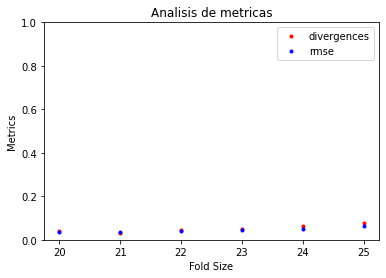

In [33]:
fold_sizes = losses.keys()
plt.plot(fold_sizes, divergences.values(), color = 'r', linewidth=0, marker='.', label='divergences')
plt.plot(fold_sizes, rmses, color = 'b', linewidth=0, marker='.', label='rmse')
plt.ylim(0, 1)
plt.ylabel('Metrics')
plt.xlabel('Fold Size')
plt.title('Analisis de metricas')
plt.legend()

/var/folders/g0/jqvp4xxs5pn4cds1xb9339xm0000gn/T/ipykernel_41781/4014329483.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "linewidth" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'figures/{enfermedad}/accumul_prediction.png', format='png', linewidth = 0.01)


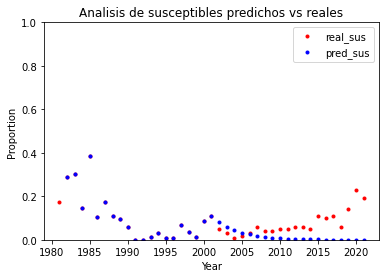

In [34]:
predicted_susceptible = res[:,0].detach().numpy()
real_susceptible = y[:,0].detach().numpy()
plt.plot(data.index, real_susceptible, color = 'r', linewidth=0, marker='.', label='real_sus')
plt.plot(data.index[1:], predicted_susceptible, color = 'b', linewidth=0, marker='.', label='pred_sus')
plt.ylim(0, 1)
plt.ylabel('Proportion')
plt.xlabel('Year')
plt.title('Analisis de susceptibles predichos vs reales')
plt.legend()
plt.savefig(f'figures/{enfermedad}/accumul_prediction.png', format='png', linewidth = 0.01)

/var/folders/g0/jqvp4xxs5pn4cds1xb9339xm0000gn/T/ipykernel_41781/1083684465.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "linewidth" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'figures/{enfermedad}/accumul_prediction_vaccinated.png', format='png', linewidth = 0.01)


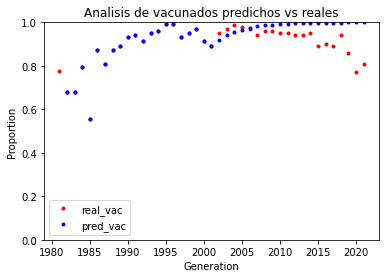

In [35]:
predicted_vaccinated = res[:,3].detach().numpy()
real_vaccinated = y[:,3].detach().numpy()
plt.plot(data.index, real_vaccinated, color = 'r', linewidth=0, marker='.', label='real_vac')
plt.plot(data.index[1:], predicted_vaccinated, color = 'b', linewidth=0, marker='.', label='pred_vac')
plt.ylim(0, 1)
plt.ylabel('Proportion')
plt.xlabel('Generation')
plt.title('Analisis de vacunados predichos vs reales')
plt.legend()
plt.savefig(f'figures/{enfermedad}/accumul_prediction_vaccinated.png', format='png', linewidth = 0.01)

/var/folders/g0/jqvp4xxs5pn4cds1xb9339xm0000gn/T/ipykernel_41781/1288286015.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "linewidth" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'figures/{enfermedad}/accumul_infected.png', format='png', linewidth = 0.01)


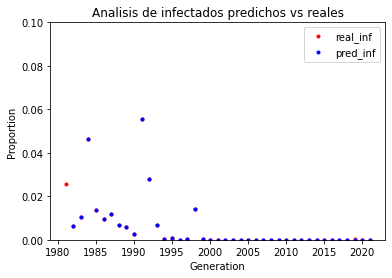

In [36]:
predicted_infected = res[:,1].detach().numpy()
real_infected = y[:,1].detach().numpy()
plt.plot(data.index, real_infected, color = 'r', linewidth=0, marker='.', label='real_inf')
plt.plot(data.index[1:], predicted_infected, color = 'b', linewidth=0, marker='.', label='pred_inf')
plt.ylim(0, 0.1)
plt.ylabel('Proportion')
plt.xlabel('Generation')
plt.title('Analisis de infectados predichos vs reales')
plt.legend()
plt.savefig(f'figures/{enfermedad}/accumul_infected.png', format='png', linewidth = 0.01)

/var/folders/g0/jqvp4xxs5pn4cds1xb9339xm0000gn/T/ipykernel_41781/3215084560.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "linewidth" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'figures/{enfermedad}/accumul_prediction_rec.png', format='png', linewidth = 0.01)


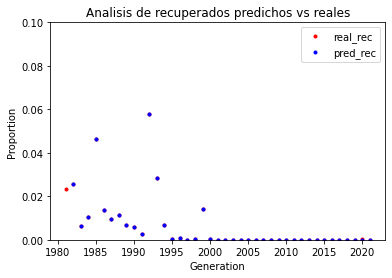

In [37]:
predicted_recov = res[:,2].detach().numpy()
real_recov = y[:,2].detach().numpy()
plt.plot(data.index, real_recov, color = 'r', linewidth=0, marker='.', label='real_rec')
plt.plot(data.index[1:], predicted_recov, color = 'b', linewidth=0, marker='.', label='pred_rec')
plt.ylim(0, 0.1)
plt.ylabel('Proportion')
plt.xlabel('Generation')
plt.title('Analisis de recuperados predichos vs reales')
plt.legend()
plt.savefig(f'figures/{enfermedad}/accumul_prediction_rec.png', format='png', linewidth = 0.01)

In [38]:
params = list(model.parameters())
lambda1 = params[0].item()
lambda2 = params[1].item()
lambda3 = params[2].item()
print(params)

[Parameter containing:
tensor([[13.7385]], requires_grad=True), Parameter containing:
tensor([[0.2540]], requires_grad=True), Parameter containing:
tensor([[-0.0595]], requires_grad=True), Parameter containing:
tensor([[0.1530]], requires_grad=True)]


In [39]:
import scipy

scipy.stats.ttest_ind(real_susceptible, predicted_susceptible, equal_var=False)

Ttest_indResult(statistic=1.5875415265337929, pvalue=0.11639374034180457)

In [40]:
scipy.stats.ttest_ind(real_infected, predicted_infected, equal_var=False)

Ttest_indResult(statistic=0.18225956594296058, pvalue=0.8558459235542971)

In [41]:
scipy.stats.ttest_ind(real_recov, predicted_recov, equal_var=False)

Ttest_indResult(statistic=0.14937071840215568, pvalue=0.8816418763596612)

In [42]:
scipy.stats.ttest_ind(real_vaccinated, predicted_vaccinated, equal_var=False)

Ttest_indResult(statistic=-1.4833919940068043, pvalue=0.14196962867913904)

In [43]:
scipy.stats.kstest(real_susceptible, predicted_susceptible, method='asymp')

KstestResult(statistic=0.35487804878048784, pvalue=0.009276951063205141)

In [44]:
scipy.stats.kstest(real_infected, predicted_infected, method='asymp')

KstestResult(statistic=0.26768292682926825, pvalue=0.0935857427831357)

In [45]:
scipy.stats.kstest(real_recov, predicted_recov, method='asymp')

KstestResult(statistic=0.3902439024390244, pvalue=0.0029657890611658466)

In [46]:
scipy.stats.kstest(real_vaccinated, predicted_vaccinated, method='asymp')

KstestResult(statistic=0.3524390243902439, pvalue=0.009991478112622465)